# Data Science in a Day

## Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

## Loading Libraries

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Sourcing

In [4]:
loans = pd.read_csv("loan_data.csv")
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [6]:
loans.shape

(981, 13)

In [7]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,959.000000,967.000000,931.000000
mean,5179.795107,1601.916330,141.768509,340.078594,0.809882
std,5695.104533,2718.772806,77.899222,70.246667,0.392605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Data Cleaning 

In [8]:
loans.isnull().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# get rid of the rows where gender is null
loans.dropna(subset=['Gender'], inplace = True)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loans['Married'].value_counts(dropna=False)

Yes    621
No     344
NaN      3
Name: Married, dtype: int64

In [15]:
# get rid of the rows where marreid is null
loans.dropna(subset=['Married'], inplace = True)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loans['Dependents'].value_counts(dropna=False)

0      548
1      159
2      158
3+      88
NaN     12
Name: Dependents, dtype: int64

In [21]:
# replace Nan dependents with 0
loans['Dependents'] = loans['Dependents'].fillna('0')
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
loans['Self_Employed'].value_counts(dropna=False)

No     818
Yes    115
NaN     32
Name: Self_Employed, dtype: int64

In [23]:
# replace Nan self employed with No
loans['Self_Employed'] = loans['Self_Employed'].fillna('No')
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
loans['LoanAmount'].value_counts(dropna=False)

 120.0    29
 110.0    26
 100.0    24
NaN       21
 187.0    21
 150.0    19
 125.0    18
 130.0    18
 90.0     15
 160.0    15
 113.0    14
 128.0    14
 135.0    14
 108.0    13
 104.0    12
 95.0     12
 80.0     12
 70.0     12
 96.0     11
 200.0    10
 185.0    10
 116.0    10
 180.0    10
 138.0    10
 115.0    10
 132.0     9
 140.0     9
 131.0     9
 152.0     9
 122.0     9
          ..
 380.0     1
 236.0     1
 308.0     1
 228.0     1
 376.0     1
 89.0      1
 54.0      1
 436.0     1
 304.0     1
 42.0      1
 178.0     1
 230.0     1
 336.0     1
 86.0      1
 79.0      1
 256.0     1
 77.0      1
 232.0     1
 57.0      1
 496.0     1
 36.0      1
 9.0       1
 26.0      1
 324.0     1
 196.0     1
 400.0     1
 250.0     1
 500.0     1
 246.0     1
 296.0     1
Name: LoanAmount, Length: 231, dtype: int64

In [29]:
# replace Nan LoanAmount with 0
loans['LoanAmount'] = loans['LoanAmount'].fillna(float(0))
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
loans['Loan_Amount_Term'].value_counts(dropna=False)

 360.0    811
 180.0     65
 480.0     22
 300.0     19
NaN        14
 84.0       7
 240.0      7
 0.0        6
 120.0      4
 36.0       3
 60.0       3
 12.0       2
 350.0      1
 6.0        1
Name: Loan_Amount_Term, dtype: int64

In [31]:
# replace Nan LoanAmount Term with 0
loans['Loan_Amount_Term'] = loans['Loan_Amount_Term'].fillna(float(0))
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
loans['Credit_History'].value_counts(dropna=False)

 1.0    742
 0.0    174
NaN      49
Name: Credit_History, dtype: int64

In [33]:
# replace Nan Credit History Term with 0
loans['Credit_History'] = loans['Credit_History'].fillna(float(0))
loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
loans.shape

(965, 13)

## Data Exploration

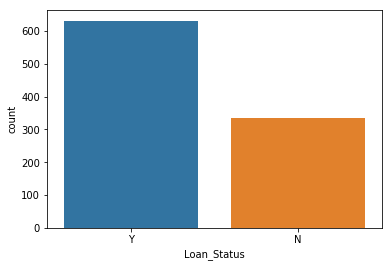

In [38]:
sns.countplot(x='Loan_Status', data = loans)

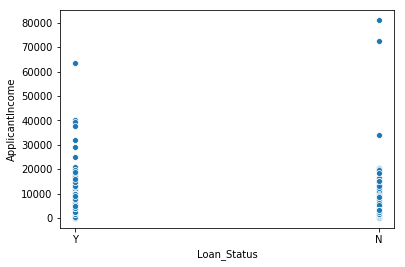

In [39]:
sns.scatterplot(x='Loan_Status', y = 'ApplicantIncome', data = loans)

## Data Transformation

## Modelling

### Making Predictions

Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

We need to compare those values with the test set!

## Model Evaluation

Q: Which model is better? 
> A: 


Q: Why?
> A:

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500